In [9]:
import numpy as np
import pandas as pd
import cv2

from sklearn.datasets import fetch_openml # veri kümesi için kullanılır
from skimage.filters import threshold_otsu #optimal bir eşik değer belirtir.
# görüntü üzerindeki piksel değerlerini 2 sınıfa böler , eşik değerlerinin üst ü bir sınıfa atanır, eşik değerin altı bir sınıfa atanır

from sklearn.model_selection import train_test_split # veri kümemizi eğitim ve test olarak böler

from sklearn.tree import DecisionTreeClassifier #karar ağacı sınıflandırma modeli
from sklearn.ensemble import RandomForestClassifier # rastgele orman sınıflandırma modeli

from sklearn.metrics import accuracy_score # başarım ölcütü
from sklearn.metrics import f1_score # başarım ölçütü

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # confusion matrix hesaplama ve gösterim

import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# MNIST veri kümesi yüklenmesi

mnist = fetch_openml('mnist_784',version=1)

C:\Users\m-xz9\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
X = mnist["data"] # veriler
y = mnist["target"] # etiketleri

In [15]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [19]:
y.unique().tolist()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']

In [20]:
pd.DataFrame(y).groupby("class").size()

class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

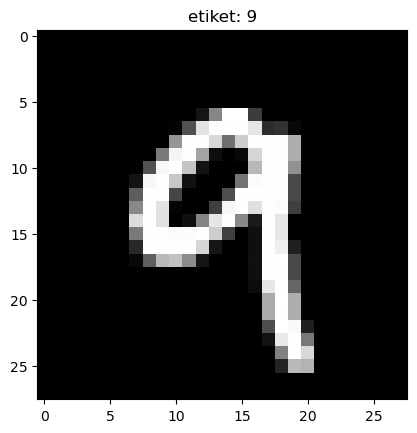

In [52]:
X = mnist["data"].to_numpy()
y = mnist["target"]

# örnek bir görüntü seçme

image_index = 110
image = X[image_index].reshape(28,28)

# görüntüyü gösterme
plt.imshow(image,cmap="gray")
plt.title('etiket: '+str(y[image_index]))
plt.show()

In [24]:
X_clean=[]

for image in X:
    threshold_value = threshold_otsu(image)
    binary_image = image>threshold_value
    X_clean.append(binary_image.flatten())

In [25]:
X_clean[5]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
# Veriyi train ve test olarak bölme

X_train, X_test, y_train, y_test = train_test_split(X_clean,y,test_size=0.2,random_state=42)

In [28]:
len(X_train)

56000

In [29]:
len(y_train)

56000

In [33]:
## makine öğrenmesi

model = DecisionTreeClassifier()

# model eğitimi
model.fit(X_train,y_train)

# test veri kümesi üzerinden tahmin yapılması

y_pred = model.predict(X_test)


In [34]:
y_pred

array(['8', '4', '6', ..., '2', '7', '1'], dtype=object)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",accuracy)

accuracy :  0.8685714285714285


In [36]:
f1_score = f1_score(y_test,y_pred,average="weighted")
print("f1_score: ",f1_score)

f1_score:  0.8684669638970749


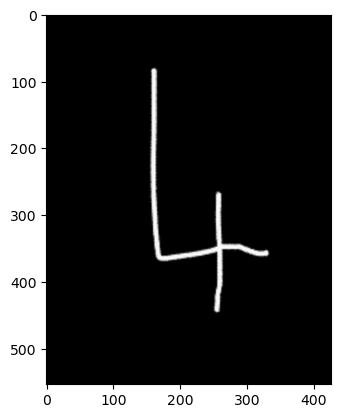

In [41]:
# dışarıdan veri ile test etme

image = cv2.imread('dort.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)

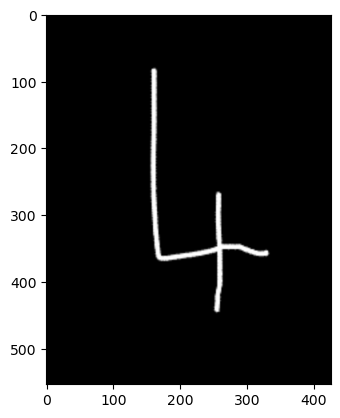

In [42]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image,cmap="gray")

In [43]:
image.shape

(554, 426)

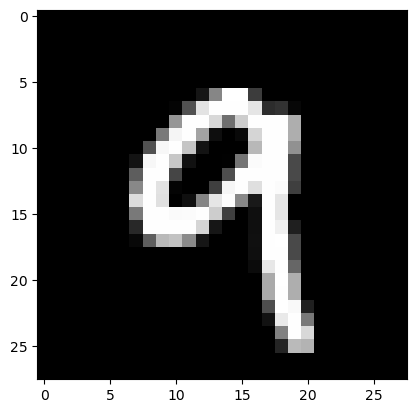

In [53]:
image = cv2.resize(image,(28,28))
plt.imshow(image,cmap='gray')

In [46]:
# test verisini ön işlemden geçirme

image_array = np.array(image)

threshold_value = threshold_otsu(image_array)
binary_image = image>threshold_value
image_array = binary_image.flatten()
image_array = image_array.reshape(1,-1) # 1 boyutlu vektöre çevirdik

In [54]:
#image_array

In [48]:
prediction = model.predict(image_array) # ön işlemden geçirip binary hale getirdiğimiz vektörü modele gönderiyoruz
print("tahmin : ",prediction)

tahmin :  ['4']


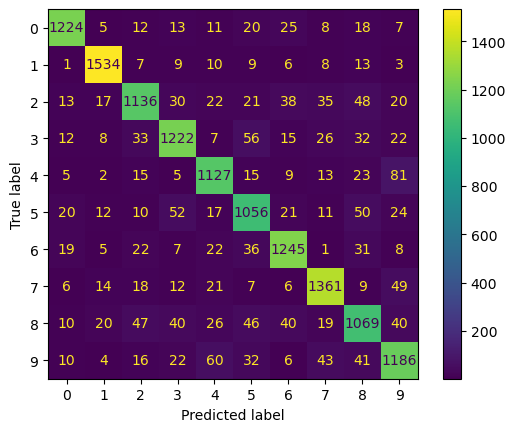

In [49]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [57]:
from sklearn import metrics 


X_train, X_test, y_train, y_test = train_test_split(X_clean,y,test_size=0.2,random_state=42)

## makine öğrenmesi
model = DecisionTreeClassifier()

# model eğitimi
model.fit(X_train,y_train)

# test veri kümesi üzerinden tahmin yapılması
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",accuracy)


f1_score = metrics.f1_score(y_test,y_pred,average="weighted")
print("f1_score: ",f1_score)

accuracy :  0.8677142857142857
f1_score:  0.8675136747750233


In [58]:
# random forest modeli ile eğitim

X_train, X_test, y_train, y_test = train_test_split(X_clean,y,test_size=0.2,random_state=42)

## makine öğrenmesi
model = RandomForestClassifier()

# model eğitimi
model.fit(X_train,y_train)

# test veri kümesi üzerinden tahmin yapılması
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",accuracy)


f1_score = metrics.f1_score(y_test,y_pred,average="weighted")
print("f1_score: ",f1_score)

accuracy :  0.9658571428571429
f1_score:  0.9658272051581439
